# FIT 5196 Data wrangling assignment 3
### Student name : HsinHui Lin
### Student number : 28464176
### Date : 20 Oct 2018
### version : 1.0
### environment : python 3.6 and jupyter notebook
### library used : datetimes, pandas, json, math,shaply.geometry, shaply.geometry.polygon, numpy,sklearn, statsmodels.formula.api


# Task 1: Data Integration

### Concatenating, appending, merging and joining are the approaches to combine/merge the data by applying the dataframe of pandas. 

In [1]:
from datetime import datetime

In [2]:
import pandas as pd

### Read the .real_state jason file and take a look with all of the keys , for example "property_id".

In [3]:
import json

with open('real_state.json') as json_data:
    d = json.load(json_data)
    print(d)

[{'property_id': 65875.0, 'lat': -37.781551, 'lng': 145.313927, 'addr_street': '17 Sweetland Road', 'price': 8585000.0, 'property_type': 'house', 'year': 2010.0, 'bedrooms': 4.0, 'bathrooms': 2.0, 'parking_space': 2.0}, {'property_id': 44152.0, 'lat': -37.70018005, 'lng': 145.1107636, 'addr_street': '110 Hume Street', 'price': 4455000.0, 'property_type': 'house', 'year': 2009.0, 'bedrooms': 4.0, 'bathrooms': 1.0, 'parking_space': 2.0}, {'property_id': 74555.0, 'lat': -37.902181, 'lng': 145.05612, 'addr_street': '123 Leila Road', 'price': 7749000.0, 'property_type': 'house', 'year': 2014.0, 'bedrooms': 3.0, 'bathrooms': 2.0, 'parking_space': 2.0}, {'property_id': 89820.0, 'lat': -37.962083, 'lng': 145.050082, 'addr_street': '10 Heather Grove', 'price': 14640000.0, 'property_type': 'house', 'year': 2013.0, 'bedrooms': 4.0, 'bathrooms': 2.0, 'parking_space': 3.0}, {'property_id': 47848.0, 'lat': -37.815312, 'lng': 145.050793, 'addr_street': '12a Mount Street', 'price': 23700000.0, 'proper

### Use dataframe to get the value from the json file

In [4]:
df = pd.read_json("real_state.json")
df.loc[0,'property_id']

65875.0

### Convert the json file to the csv file successfully. However, need to reorder the columns. 
### Use df.head() to inspect the content and with the result of needing to calculate suburb, the cloest shopping center to the property, distance to the shopping center, the closest train station to the property and the distance between them, travel mins to CBD, tranfer_flag,the cloest hospital and supermarket and the distances. 

### The lat is around -37 and lng is around 145. Then, consider to use basemap to create the graph of the suburb.

In [5]:
df.to_csv("<28464176>_solution.csv")
df= pd.read_csv('<28464176>_solution.csv')
df.head()

,Unnamed: 0,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,0,17 Sweetland Road,2.0,4.0,-37.781551,145.313927,2.0,8585000.0,65875.0,house,2010.0
1,1,110 Hume Street,1.0,4.0,-37.700180,145.110764,2.0,4455000.0,44152.0,house,2009.0
2,2,123 Leila Road,2.0,3.0,-37.902181,145.056120,2.0,7749000.0,74555.0,house,2014.0
3,3,10 Heather Grove,2.0,4.0,-37.962083,145.050082,3.0,14640000.0,89820.0,house,2013.0
4,4,12a Mount Street,3.0,4.0,-37.815312,145.050793,3.0,23700000.0,47848.0,house,2015.0


### The original file could include the missing value which is a none value and need to check. Missing value is directly correlated with missing value itself. However, only to remove the value in this part. The function info( ) also include see 'non-null' observations for each data column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 11 columns):
Unnamed: 0       1010 non-null int64
addr_street      1007 non-null object
bathrooms        1007 non-null float64
bedrooms         1007 non-null float64
lat              1007 non-null float64
lng              1007 non-null float64
parking_space    1007 non-null float64
price            1007 non-null float64
property_id      1007 non-null float64
property_type    1007 non-null object
year             1007 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 86.9+ KB


### Return sum of missing values for each column

In [7]:
df.isnull().sum()

Unnamed: 0       0
addr_street      3
bathrooms        3
bedrooms         3
lat              3
lng              3
parking_space    3
price            3
property_id      3
property_type    3
year             3
dtype: int64

### Check the shape of your data in (rows, columns) format

In [8]:
df.shape

(1010, 11)

### There are only a few null values and deleting values will not cause adverse effects on the result, remove them from the DataFrame and store that in a new DataFrame.

In [9]:
df = df.dropna()

In [10]:
df_train = pd.read_csv('stops.txt')

In [11]:
df_train

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602
5,19830,Bittern Railway Station,Bittern,-38.337390,145.178027
6,19831,Hastings Railway Station,Hastings,-38.305659,145.185980
7,19832,Tyabb Railway Station,Tyabb,-38.259815,145.186401
8,19833,Somerville Railway Station,Somerville,-38.225342,145.176245
9,19834,Baxter Railway Station,Baxter,-38.194043,145.160526


### Use Haversine formula and the radius of the earth is 6378 km.

In [12]:
# Haversine formula
from math import sin, cos, sqrt, atan2, radians
def distance(lat1,lon1,lat2,lon2):
# approximate radius of earth in km
    R = 6378.0
    lat1= radians(lat1)
    lon1= radians(lon1) 
    lat2= radians(lat2)
    lon2= radians(lon2)
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    a= sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c= 2*atan2(sqrt(a),sqrt(1-a))
    
    return R * c
    

### Get the the lattitude and longtitude of property 

In [13]:
def find_shortest_train_distance(row):
    shortest_distance = -1
    for i,t in df_train.iterrows():
        if shortest_distance == -1 or shortest_distance > distance(row.lat, row.lng, t.stop_lat, t.stop_lon):
            shortest_distance = distance(row.lat, row.lng, t.stop_lat, t.stop_lon)
    return int(shortest_distance * 1000)

In [14]:
def find_shortest_train_station_id(row):
    shortest_distance= -1
    train_station_id = 0
    for i,t in df_train.iterrows():
        if shortest_distance == -1 or shortest_distance> distance(row.lat, row.lng,t.stop_lat,t.stop_lon):
            shortest_distance = distance(row.lat,row.lng,t.stop_lat, t.stop_lon)
            train_station_id= t.stop_id
    return train_station_id

In [15]:
df['distance_to_train_station']=df.apply( find_shortest_train_distance, axis=1)

In [16]:
df['train_station_id'] = df.apply(find_shortest_train_station_id, axis = 1)

In [17]:
df_sc = pd.read_excel('shopingcenters.xlsx')

In [18]:
df_stoptimes = pd.read_csv('stop_times.txt')

In [19]:
df_stoptimes.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [20]:
df_route=pd.read_csv('routes.txt')

In [21]:
df_route

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
5,2-BEL-B-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2
6,2-BEL-C-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2
7,2-BEL-D-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2
8,2-BEL-E-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2
9,2-BEL-F-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2


In [22]:
df_trip=pd.read_csv('trips.txt')

In [23]:
df_trip

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
5,2-ALM-F-mjp-1,T0,17068009.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
6,2-ALM-F-mjp-1,T0,17068018.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
7,2-ALM-F-mjp-1,T0,17068024.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8,2-ALM-F-mjp-1,T0,17068029.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
9,2-ALM-F-mjp-1,T0,17068034.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [24]:
df_train_time = pd.read_csv('stop_times.txt')
df_train_time.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [25]:
df_trip = pd.read_csv('trips.txt')
df_trip.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [26]:
df_trip

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
5,2-ALM-F-mjp-1,T0,17068009.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
6,2-ALM-F-mjp-1,T0,17068018.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
7,2-ALM-F-mjp-1,T0,17068024.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8,2-ALM-F-mjp-1,T0,17068029.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
9,2-ALM-F-mjp-1,T0,17068034.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [27]:
df_join=df_train_time.join(df_trip.set_index('trip_id'),on='trip_id')

In [28]:
df_join.head(10)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
5,17182517.T2.2-ALM-B-mjp-1.1.H,05:05:00,05:05:00,19852,6,NaN,0,0,4413.268782,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
6,17182517.T2.2-ALM-B-mjp-1.1.H,05:08:00,05:08:00,19853,7,NaN,0,0,5920.877559,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
7,17182521.T2.2-ALM-B-mjp-1.1.H,05:27:00,05:27:00,19847,1,NaN,0,0,0.000000,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
8,17182521.T2.2-ALM-B-mjp-1.1.H,05:28:00,05:28:00,19848,2,NaN,0,0,723.017818,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0
9,17182521.T2.2-ALM-B-mjp-1.1.H,05:30:00,05:30:00,19849,3,NaN,0,0,1951.735072,2-ALM-B-mjp-1,T2,2-ALM-B-mjp-1.1.H,City (Flinders Street),0


In [29]:
def transfer_flag(row):
#     print('row',row)
    transfer_flag= -1
#     for i,t in df_join.iterrows():
#         print('t', t)
    if row.trip_headsign == "City (Flinders Street)":
        transfer_flag = 0
    else:
        transfer_flag = 1
    return transfer_flag

In [30]:
df_join['transfer_flag']=df_join.apply(transfer_flag, axis=1)

In [31]:
df['transfer_flag']=df_join.apply(transfer_flag, axis=1)

In [32]:
df_join.tail()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id,transfer_flag
390300,17199140.UJ.2-ain-mjp-1.4.R,18:09:00,18:09:00,20028,1,NaN,0,0,0.000000,2-ain-mjp-1,UJ_1,2-ain-mjp-1.4.R,Flinders Street Southern Cross Station,1,1
390301,17199140.UJ.2-ain-mjp-1.4.R,18:15:00,18:15:00,19973,4,NaN,0,0,4011.161109,2-ain-mjp-1,UJ_1,2-ain-mjp-1.4.R,Flinders Street Southern Cross Station,1,1
390302,17199140.UJ.2-ain-mjp-1.4.R,18:19:00,18:19:00,22180,5,NaN,0,0,5676.741894,2-ain-mjp-1,UJ_1,2-ain-mjp-1.4.R,Flinders Street Southern Cross Station,1,1
390303,17199142.T2.2-ain-mjp-1.5.R,24:00:00,24:00:00,20027,1,NaN,0,0,0.000000,2-ain-mjp-1,T2_1,2-ain-mjp-1.5.R,Flinders Street Southern Cross Station,1,1
390304,17199142.T2.2-ain-mjp-1.5.R,24:15:00,24:15:00,19854,7,NaN,0,0,8069.393087,2-ain-mjp-1,T2_1,2-ain-mjp-1.5.R,Flinders Street Southern Cross Station,1,1


In [ ]:
def get_minutes(t):
    t1 = dt.datetime.strptime(t, '%H:%M:%S')
    return t1

In [ ]:
df_rejoin = df_join.rename(columns={'stop_id': 'train_station_id'})

In [ ]:
df_rejoin.head()

In [ ]:
df.head()

In [33]:
df_cal_time = pd.read_csv('calendar_dates.txt')
df_cal_time

,service_id,date,exception_type
0,T0,20151103,2
1,T0+a5,20151103,2


In [34]:
df_cal = pd.read_csv('calendar.txt')
df_cal

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018
5,UJ_1,0,0,0,0,0,0,1,20151016,20151018
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
9,T2_2,0,0,0,0,0,1,0,20151023,20151122


In [ ]:
df_new.head()

In [ ]:
columns = ['addr_street','bathrooms','bedrooms','lat','lng','parking_space' ]
df_new.drop(columns, inplace=True, axis=1)

In [ ]:
df_new = df_new.drop(['Unnamed: 0'], axis=1)

In [ ]:
columns = ['price','property_type','stop_headsign','pickup_type','drop_off_type','year' ]
df_new.drop(columns, inplace=True, axis=1)

In [ ]:
columns = ['distance_to_train_station','trip_id','shape_dist_traveled','route_id','direction_id']
df_new.drop(columns, inplace=True, axis=1)

In [ ]:
df_new

In [ ]:
df_tnew=df_new.loc[df_new['service_id'] != 'T2_1']

In [ ]:
df_tnew=df_tnew.loc[df_new['service_id'] != 'T2']

In [ ]:
df_tnew=df_tnew.loc[df_new['service_id'] != 'UJ']

In [ ]:
df_tnew=df_tnew.loc[df_new['service_id'] != 'UJ_1']

In [ ]:
df_tnew=df_tnew.loc[df_new['service_id'] != 'T2_2']

In [ ]:
df_tnew=df_tnew.loc[df_new['service_id'] != 'UJ_2']

In [ ]:
df_tnew.head()

In [ ]:
df_flatnew=df_tnew.loc[df_tnew['transfer_flag_x'] == 0.0]

In [ ]:
df_flatnew=df_tnew.loc[df_tnew['transfer_flag_y'] != 1]

In [ ]:
df_flatnew.head()

In [ ]:
df_flatnew[['h','m','s']] = df_flatnew['arrival_time'].astype(str).str.split(':', expand=True).astype(int)
df7to9 =df_flatnew[df_flatnew['h'].between(7, 8, inclusive=True)]

In [ ]:
df7to9CBD=df7to9.loc[df7to9['train_station_id'] == 19854]

In [ ]:
df7to9CBD

In [ ]:
def find_travel_time(row):
    travel_minutes=0
    for i,t in df7to9.iterrows():
        if shape_id==shape_id and service_id==service_id
        travel_minutes=minutes
    return travel_minutes

In [36]:
def find_shortest_shoppingcenter_distance(row):
    shortest_distance = -1
    for i,t in df_sc.iterrows():
        if shortest_distance == -1 or shortest_distance > distance(row.lat, row.lng, t.lat, t.lng):
            shortest_distance = distance(row.lat, row.lng, t.lat, t.lng)
    return int(shortest_distance * 1000)

In [37]:
def find_shortest_shoppingcenter_id(row):
    shortest_distance =-1
    sc_id = 0
    for i,t in df_sc.iterrows():
        if shortest_distance ==-1 or shortest_distance>distance(row.lat, row.lng, t.lat, t.lng):
            shortest_distance = distance(row.lat,row.lng,t.lat,t.lng)
            shoppingcenter_id= t.sc_id
    return shoppingcenter_id

In [38]:
df['distance_to_sc']=df.apply(find_shortest_shoppingcenter_distance, axis=1)

In [39]:
df['shopping_center']=df.apply(find_shortest_shoppingcenter_id, axis=1)

In [42]:
df['travel_min_to_CBD']=" "

In [43]:
df_sm = pd.read_html('supermarkets.html')[0]

In [44]:
df_sm

,Unnamed: 0,id,lat,lng,type
0,0,S_001,-37.883978,144.735287,Woolworths
1,1,S_002,-41.161591,147.514797,Woolworths
2,2,S_003,-37.984078,145.077167,Woolworths
3,3,S_004,-37.707023,144.938740,Woolworths
4,4,S_005,-37.597670,144.938413,Woolworths
5,5,S_006,-38.101859,145.184101,Woolworths
6,6,S_007,-37.867486,144.742849,Woolworths
7,7,S_008,-37.889410,145.293758,Woolworths
8,8,S_009,-37.915287,144.995748,Woolworths
9,9,S_010,-37.922149,145.083448,Woolworths


In [45]:
def find_shortest_supermarket_distance(row):
    shortest_distance = -1
    for i,t in df_sm.iterrows():
        if shortest_distance == -1 or shortest_distance > distance(row.lat, row.lng, t.lat, t.lng):
            shortest_distance = distance(row.lat, row.lng, t.lat, t.lng)
    return int(shortest_distance * 1000)

In [46]:
def find_shortest_supermarket_id(row):
    shortest_distance =-1
    supermarket_id = 0
    for i,t in df_sm.iterrows():
        if shortest_distance ==-1 or shortest_distance>distance(row.lat, row.lng, t.lat, t.lng):
            shortest_distance = distance(row.lat,row.lng,t.lat,t.lng)
            supermarket_id= t.id
    return supermarket_id

In [47]:
df['distance_to_supermarket']=df.apply(find_shortest_supermarket_distance, axis=1)

In [48]:
df['supermarket_id']=df.apply(find_shortest_supermarket_id, axis=1)

In [49]:
df.head()

,Unnamed: 0,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,distance_to_train_station,train_station_id,transfer_flag,distance_to_sc,shopping_center,travel_min_to_CBD,distance_to_supermarket,supermarket_id
0,0,17 Sweetland Road,2.0,4.0,-37.781551,145.313927,2.0,8585000.0,65875.0,house,2010.0,380,19877,0,2604,SC_084,,2313,S_224
1,1,110 Hume Street,1.0,4.0,-37.700180,145.110764,2.0,4455000.0,44152.0,house,2009.0,474,19985,0,5226,SC_051,,791,S_210
2,2,123 Leila Road,2.0,3.0,-37.902181,145.056120,2.0,7749000.0,74555.0,house,2014.0,1454,19941,0,1952,SC_041,,1614,S_015
3,3,10 Heather Grove,2.0,4.0,-37.962083,145.050082,3.0,14640000.0,89820.0,house,2013.0,642,19866,0,1644,SC_079,,581,S_023
4,4,12a Mount Street,3.0,4.0,-37.815312,145.050793,3.0,23700000.0,47848.0,house,2015.0,900,19903,0,1190,SC_099,,1444,S_208


In [50]:
df_hospital = pd.read_json("hospitals.json")

In [51]:
def find_shortest_hospital_distance(row):
    shortest_distance = -1
    for i,t in df_hospital.iterrows():
        if shortest_distance == -1 or shortest_distance > distance(row.lat, row.lng, t.lat, t.lng):
            shortest_distance = distance(row.lat, row.lng, t.lat, t.lng)
    return int(shortest_distance * 1000)

In [52]:
def find_shortest_hospital_id(row):
    shortest_distance= -1
    hospital_id = 0
    for i,t in df_hospital.iterrows():
        if shortest_distance == -1 or shortest_distance> distance(row.lat, row.lng,t.lat,t.lng):
            shortest_distance = distance(row.lat,row.lng,t.lat, t.lng)
            hospital_id= t.id
    return hospital_id

In [53]:
df['distance_to_hospital']=df.apply(find_shortest_hospital_distance, axis=1)

In [54]:
df['hospital_id'] = df.apply(find_shortest_hospital_id, axis = 1)

In [55]:
df.head()

,Unnamed: 0,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,distance_to_train_station,train_station_id,transfer_flag,distance_to_sc,shopping_center,travel_min_to_CBD,distance_to_supermarket,supermarket_id,distance_to_hospital,hospital_id
0,0,17 Sweetland Road,2.0,4.0,-37.781551,145.313927,2.0,8585000.0,65875.0,house,...,380,19877,0,2604,SC_084,,2313,S_224,4204,hospital_113
1,1,110 Hume Street,1.0,4.0,-37.700180,145.110764,2.0,4455000.0,44152.0,house,...,474,19985,0,5226,SC_051,,791,S_210,699,hospital_075
2,2,123 Leila Road,2.0,3.0,-37.902181,145.056120,2.0,7749000.0,74555.0,house,...,1454,19941,0,1952,SC_041,,1614,S_015,2419,hospital_159
3,3,10 Heather Grove,2.0,4.0,-37.962083,145.050082,3.0,14640000.0,89820.0,house,...,642,19866,0,1644,SC_079,,581,S_023,616,hospital_082
4,4,12a Mount Street,3.0,4.0,-37.815312,145.050793,3.0,23700000.0,47848.0,house,...,900,19903,0,1190,SC_099,,1444,S_208,768,hospital_064


In [56]:
df = df.drop(['Unnamed: 0'], axis=1)

In [57]:
df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,distance_to_train_station,train_station_id,transfer_flag,distance_to_sc,shopping_center,travel_min_to_CBD,distance_to_supermarket,supermarket_id,distance_to_hospital,hospital_id
0,17 Sweetland Road,2.0,4.0,-37.781551,145.313927,2.0,8585000.0,65875.0,house,2010.0,380,19877,0,2604,SC_084,,2313,S_224,4204,hospital_113
1,110 Hume Street,1.0,4.0,-37.700180,145.110764,2.0,4455000.0,44152.0,house,2009.0,474,19985,0,5226,SC_051,,791,S_210,699,hospital_075
2,123 Leila Road,2.0,3.0,-37.902181,145.056120,2.0,7749000.0,74555.0,house,2014.0,1454,19941,0,1952,SC_041,,1614,S_015,2419,hospital_159
3,10 Heather Grove,2.0,4.0,-37.962083,145.050082,3.0,14640000.0,89820.0,house,2013.0,642,19866,0,1644,SC_079,,581,S_023,616,hospital_082
4,12a Mount Street,3.0,4.0,-37.815312,145.050793,3.0,23700000.0,47848.0,house,2015.0,900,19903,0,1190,SC_099,,1444,S_208,768,hospital_064


### change the value of column into integer.

In [58]:
df["bathrooms"]= df["bathrooms"].astype(int)

In [59]:
df["bedrooms"] = df["bedrooms"].astype(int)

In [60]:
df["parking_space"]=df["parking_space"].astype(int)

In [61]:
df['price'] = df['price'].astype(int)

In [62]:
df['property_id']=df['property_id'].astype(int)

In [63]:
df['year']=df['year'].astype(int)

In [64]:
df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,distance_to_train_station,train_station_id,transfer_flag,distance_to_sc,shopping_center,travel_min_to_CBD,distance_to_supermarket,supermarket_id,distance_to_hospital,hospital_id
0,17 Sweetland Road,2,4,-37.781551,145.313927,2,8585000,65875,house,2010,380,19877,0,2604,SC_084,,2313,S_224,4204,hospital_113
1,110 Hume Street,1,4,-37.700180,145.110764,2,4455000,44152,house,2009,474,19985,0,5226,SC_051,,791,S_210,699,hospital_075
2,123 Leila Road,2,3,-37.902181,145.056120,2,7749000,74555,house,2014,1454,19941,0,1952,SC_041,,1614,S_015,2419,hospital_159
3,10 Heather Grove,2,4,-37.962083,145.050082,3,14640000,89820,house,2013,642,19866,0,1644,SC_079,,581,S_023,616,hospital_082
4,12a Mount Street,3,4,-37.815312,145.050793,3,23700000,47848,house,2015,900,19903,0,1190,SC_099,,1444,S_208,768,hospital_064


### using the agorithom of polygon
### This part need to use and manage spatial data therefore Geopanda could apply in the part. There is a dataframe of all public transport stops , the latitude and longitude. The text data of latitude and longitdue could convert to a point geometry which contribute to find all stops in a specific area or within a polygon. Shapely is a dependency of Geopandas that helps to manipulate geometry data types. 

In [65]:
import shapefile

In [66]:
shape = shapefile.Reader("VIC_LOCALITY_POLYGON_shp.shp")

In [67]:
features = shape.shapeRecords()

In [68]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [69]:
def find_suburb(row):
    for f in features:
        if Polygon(f.shape.points).contains(Point(row.lng, row.lat)):
            return f.record[6]
    return 'not available'

In [70]:
df['suburb'] = df.apply(find_suburb, axis=1)

In [71]:
df.head(20)

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,...,train_station_id,transfer_flag,distance_to_sc,shopping_center,travel_min_to_CBD,distance_to_supermarket,supermarket_id,distance_to_hospital,hospital_id,suburb
0,17 Sweetland Road,2,4,-37.781551,145.313927,2,8585000,65875,house,2010,...,19877,0,2604,SC_084,,2313,S_224,4204,hospital_113,MOOROOLBARK
1,110 Hume Street,1,4,-37.700180,145.110764,2,4455000,44152,house,2009,...,19985,0,5226,SC_051,,791,S_210,699,hospital_075,GREENSBOROUGH
2,123 Leila Road,2,3,-37.902181,145.056120,2,7749000,74555,house,2014,...,19941,0,1952,SC_041,,1614,S_015,2419,hospital_159,CARNEGIE
3,10 Heather Grove,2,4,-37.962083,145.050082,3,14640000,89820,house,2013,...,19866,0,1644,SC_079,,581,S_023,616,hospital_082,CHELTENHAM
4,12a Mount Street,3,4,-37.815312,145.050793,3,23700000,47848,house,2015,...,19903,0,1190,SC_099,,1444,S_208,768,hospital_064,KEW
5,39 Windsor Street,1,3,-37.802220,144.891947,1,5760000,963,house,2012,...,20024,0,2841,SC_043,,557,S_201,1131,hospital_056,FOOTSCRAY
6,2a Bowen Street,1,1,-37.818240,145.036774,0,6116000,54350,house,2015,...,19904,0,269,SC_083,,224,S_208,529,hospital_086,HAWTHORN
7,8 Darvell Crt,2,4,-37.651497,144.903946,2,6970000,23797,house,2009,...,44817,0,1612,SC_072,,2336,S_211,1454,hospital_104,GREENVALE
8,2 Adeline Street,1,3,-37.708124,145.094179,3,10116000,44505,house,2016,...,19984,0,5763,SC_017,,643,S_020,1081,hospital_075,GREENSBOROUGH
9,15/60 Nickson Street,1,2,-37.695215,145.051291,1,5520000,39761,house,2010,...,19984,0,5165,SC_047,,499,S_155,900,hospital_037,BUNDOORA


### Reorder all the column

In [ ]:
df.head()

In [ ]:
df_reorder = df[['property_id','lat','lng','addr_street','suburb','price','property_type','year','bedrooms','bathrooms','parking_space','shopping_center','distance_to_sc','train_station_id','distance_to_train_station','hospital_id','distance_to_hospital','supermarket_id','distance_to_supermarket']] 

In [73]:
df_reorder = df[['property_id', 'lat', 'lng', 'addr_street', 'suburb','price','property_type','year','bedrooms','bathrooms','parking_space','shopping_center','distance_to_sc','train_station_id','distance_to_train_station','travel_min_to_CBD','transfer_flag','hospital_id','distance_to_hospital','supermarket_id','distance_to_supermarket']]

In [74]:
df_reorder.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermarket
0,65875,-37.781551,145.313927,17 Sweetland Road,MOOROOLBARK,8585000,house,2010,4,2,...,SC_084,2604,19877,380,,0,hospital_113,4204,S_224,2313
1,44152,-37.700180,145.110764,110 Hume Street,GREENSBOROUGH,4455000,house,2009,4,1,...,SC_051,5226,19985,474,,0,hospital_075,699,S_210,791
2,74555,-37.902181,145.056120,123 Leila Road,CARNEGIE,7749000,house,2014,3,2,...,SC_041,1952,19941,1454,,0,hospital_159,2419,S_015,1614
3,89820,-37.962083,145.050082,10 Heather Grove,CHELTENHAM,14640000,house,2013,4,2,...,SC_079,1644,19866,642,,0,hospital_082,616,S_023,581
4,47848,-37.815312,145.050793,12a Mount Street,KEW,23700000,house,2015,4,3,...,SC_099,1190,19903,900,,0,hospital_064,768,S_208,1444


### Get the solution csv

In [77]:
df_reorder.to_csv('<28464176>_solution.csv')

# Task 2 : Data Reshaping
### In this task, you need to study the effect of different normalization/transformation methods (i.e. standardization, minmax normalization, log, power and sqrt transformation) on the “price” attribute and observe and explain their effect on the price distribution. Also, you need to compare them to each other assuming that we want to build a linear model on price using “bedroom”, “bathroom”, “parking_space”, and “property_type” as the predictors of the linear model and recommend which one(s) do you think would work better on this data.


# Data Normalisation and Transformation
### When one or more datasets affect results disproportionately, normalization or scaling gives a level playing field. Apply different data methods for data normalization and transformation. 

## Data Normalisation

### There are two types of data normalisation: 
### 1. Z-score normalisation(standardization): where the focus is on shifting the distribution of data to have a mean of 0 and a standard deviation of 1.

### 2.Scaling:  the focus is on rescaling data value range to a specific interval, for example : Min-Max normalization Decimal scaling.


### read the solution CSV file first and take the variables as the predictor and predictand. 

In [78]:
import numpy as np

#df = pd.read_csv( '<28464176>_solution.csv', header = None, usecols = [6,7,9,10,11])
#df.columns=['price','bedrooms','bathrooms','parking_space','property_type']
#df.head()
df= pd.read_csv('<28464176>_solution.csv')
df = df[['price','bedrooms','bathrooms','parking_space','property_type']]
df

,price,bedrooms,bathrooms,parking_space,property_type
0,8585000,4,2,2,house
1,4455000,4,1,2,house
2,7749000,3,2,2,house
3,14640000,4,2,3,house
4,23700000,4,3,3,house
5,5760000,3,1,1,house
6,6116000,1,1,0,house
7,6970000,4,2,2,house
8,10116000,3,1,3,house
9,5520000,2,1,1,house


In [79]:
from sklearn import preprocessing

### Z score normalisation

In [80]:
std_scale = preprocessing.StandardScaler().fit(df[[ 'price']])
df_std = std_scale.transform(df[['price']]) # an array not a df
df_std[0:5]

array([[-0.08388772],
       [-0.76371215],
       [-0.22149867],
       [ 0.91280402],
       [ 2.40413799]])

In [81]:
df.describe() # check that μ = 0 and σ = 1... approx

,price,bedrooms,bathrooms,parking_space
count,1.007000e+03,1007.000000,1007.000000,1007.000000
mean,9.094626e+06,3.200596,1.586892,1.533267
std,6.078117e+06,0.766780,0.627522,0.799251
min,1.200000e+06,1.000000,1.000000,0.000000
25%,5.070000e+06,3.000000,1.000000,1.000000
50%,7.535000e+06,3.000000,2.000000,2.000000
75%,1.113550e+07,4.000000,2.000000,2.000000
max,4.420000e+07,5.000000,3.000000,3.000000


In [82]:
# put it alongside data... to view

df['price_scale'] = df_std # and 'MAscaled' is Malic acid scaled
df.head()

,price,bedrooms,bathrooms,parking_space,property_type,price_scale
0,8585000,4,2,2,house,-0.083888
1,4455000,4,1,2,house,-0.763712
2,7749000,3,2,2,house,-0.221499
3,14640000,4,2,3,house,0.912804
4,23700000,4,3,3,house,2.404138


In [83]:
df_std = std_scale.transform(df[['bedrooms']]) # an array not a df
df_std[0:6]
df['bedrooms_scale'] = df_std # and 'MAscaled' is Malic acid scaled
df.head()

,price,bedrooms,bathrooms,parking_space,property_type,price_scale,bedrooms_scale
0,8585000,4,2,2,house,-0.083888,-1.497033
1,4455000,4,1,2,house,-0.763712,-1.497033
2,7749000,3,2,2,house,-0.221499,-1.497033
3,14640000,4,2,3,house,0.912804,-1.497033
4,23700000,4,3,3,house,2.404138,-1.497033


In [84]:
%matplotlib inline

### The graph of Z score normalization

(<matplotlib.axes._subplots.AxesSubplot at 0x12e49ecc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12e49ecc0>)

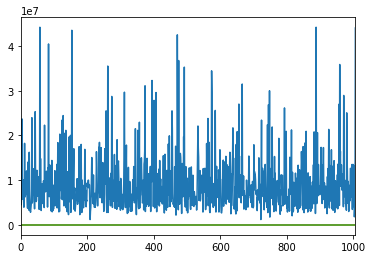

In [85]:
df["price"].plot(),df["price_scale"].plot(),df["bedrooms_scale"].plot()

### MinMax Noramlisation:
There is a different type of normalization for reshaping the range of data. Here apply the MinMaxCcaler in the same data.
 
### Use the MinMaxScaler.

In [86]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['price']])
df_minmax = minmax_scale.transform(df[['price']])
df_minmax[0:5]

array([[ 0.17174419],
       [ 0.07569767],
       [ 0.15230233],
       [ 0.31255814],
       [ 0.52325581]])

In [87]:
df['price_minmax'] = df_minmax

In [88]:
minA = df.price.min()
maxA = df.price.max()
minA, maxA

(1200000, 44200000)

In [89]:
a = df.price[0] # the first value, for practice
#Write you code here
mma = (a - minA) / (maxA - minA)
mma

0.17174418604651162

In [90]:
df_minmax[0][0]

0.17174418604651162

In [91]:
a = df[df.price == df.price.max()].price
mma = (a - minA) / (maxA - minA)
mma

58     1.0
888    1.0
Name: price, dtype: float64

### The normalized value of max must be 1.0 exactly. 

### Plot the original, standardised and normalised data values.

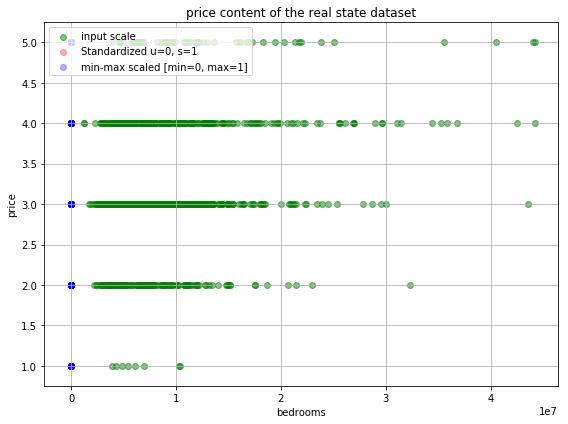

In [92]:
# and plot
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(df['price'],df['bedrooms'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df['price_scale'], df['bedrooms'], color='red',
             label='Standardized u=0, s=1', alpha=0.3)
    #plt.scatter(df['price_minmax'], df['bedrooms'], color='red',
             #label='Standardized u=0, s=1', alpha=0.3) # can't print: μ = 0, σ = 0
    
    plt.scatter(df['price_minmax'], df['bedrooms'],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('price content of the real state dataset')
    plt.xlabel('bedrooms')
    plt.ylabel('price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    #f.savefig("z_min_max.pdf", bbox_inches='tight')

plot()
plt.show()

In [93]:
df

,price,bedrooms,bathrooms,parking_space,property_type,price_scale,bedrooms_scale,price_minmax
0,8585000,4,2,2,house,-0.083888,-1.497033,0.171744
1,4455000,4,1,2,house,-0.763712,-1.497033,0.075698
2,7749000,3,2,2,house,-0.221499,-1.497033,0.152302
3,14640000,4,2,3,house,0.912804,-1.497033,0.312558
4,23700000,4,3,3,house,2.404138,-1.497033,0.523256
5,5760000,3,1,1,house,-0.548901,-1.497033,0.106047
6,6116000,1,1,0,house,-0.490301,-1.497033,0.114326
7,6970000,4,2,2,house,-0.349727,-1.497033,0.134186
8,10116000,3,1,3,house,0.168125,-1.497033,0.207349
9,5520000,2,1,1,house,-0.588406,-1.497033,0.100465


IndexError: index 1 is out of bounds for axis 1 with size 1

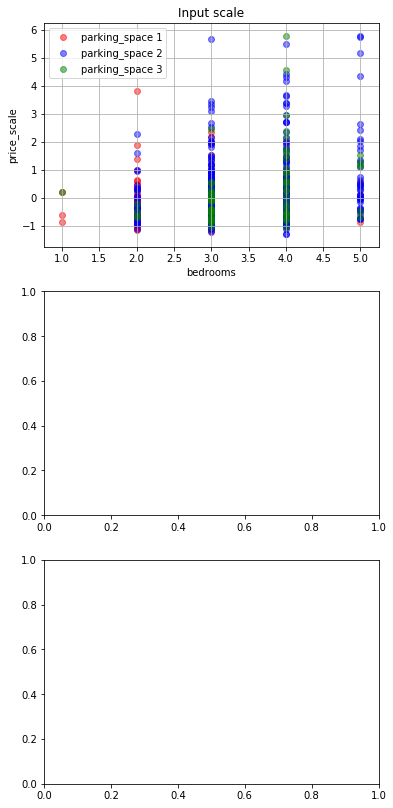

In [94]:
fig, ax = plt.subplots(3,figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['bedrooms','price_scale']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized [u=0 s=1]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['parking_space'].values == i, 0],
                  d[df['parking_space'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='parking_space %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('bedrooms')
    ax[a].set_ylabel('price_scale')
    ax[a].legend(loc='upper left')
    ax[a].grid()

%matplotlib inline
plt.tight_layout()

plt.show()

## Data Transformation
### Transformations are applied so that the data appear more relevant for statistical inferences and improve the interpretability or appearance of the plotted graphs.  Data Transformation is a process of re-expressing data in a form that is more suitable for analysis.

### The plot above includes the wine datapoints on all three different scales:
### the input scale where the alcohol content was measured in volume-percent (green),
### the standardized features (red), and
### the normalized features (blue).
### In the following plot, we will zoom in into the three different axis-scales while dispalying class values.

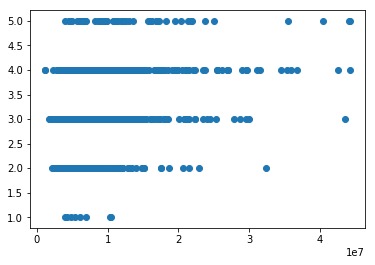

In [95]:
plt.scatter(df["price"],df["bedrooms"]) # before

### Transformation type compared with standardization type is more suitable for the multiple regression model, Because transforming the data makes the model fit the statistical assumptions better.

### There are three kinds of transformations:
### 1. Root transformation
### 2. Square power transformation
### 3. Log transformation
### The implementation of Root transformation is given as follows. 

### Root transformation:
    The square root, x to x^(1/2) = sqrt(x), is a transformation with a moderate effect on distribution shape. It is       weaker than the logarithm and the cube root and used for reducing right skewness, besides, the advantage that it       can be applied to zero values. The square root of an area has the units of a length, and it is commonly referred
    to counted data if in the condition amounts are mostly rather small.(Spano, Mariotti, Pezzotti, Damiani & Arcioni,  1987)
#### Use 'price_root' to represent the new predictor and each data point is replaced by its root. 

In [96]:
import math
df['price_root'] = None
i = 0
for row in df.iterrows():
    df['price_root'].at[i] = math.sqrt(df["bedrooms"][i])
    i += 1

df.head()

,price,bedrooms,bathrooms,parking_space,property_type,price_scale,bedrooms_scale,price_minmax,price_root
0,8585000,4,2,2,house,-0.083888,-1.497033,0.171744,2
1,4455000,4,1,2,house,-0.763712,-1.497033,0.075698,2
2,7749000,3,2,2,house,-0.221499,-1.497033,0.152302,1.73205
3,14640000,4,2,3,house,0.912804,-1.497033,0.312558,2
4,23700000,4,3,3,house,2.404138,-1.497033,0.523256,2


### The graph of root transformation

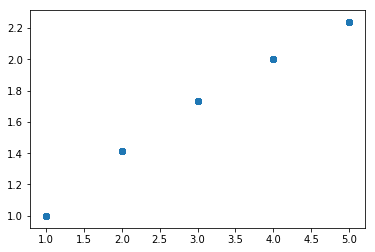

In [97]:
plt.scatter(df.bedrooms,df.price_root) # and after

### Square power transformation:

In [98]:
import math
df['price_square'] = None
i = 0
for row in df.iterrows():
    df['price_square'].at[i] = math.pow(df["bedrooms"][i],2)
    i += 1

    
df.head()

,price,bedrooms,bathrooms,parking_space,property_type,price_scale,bedrooms_scale,price_minmax,price_root,price_square
0,8585000,4,2,2,house,-0.083888,-1.497033,0.171744,2,16
1,4455000,4,1,2,house,-0.763712,-1.497033,0.075698,2,16
2,7749000,3,2,2,house,-0.221499,-1.497033,0.152302,1.73205,9
3,14640000,4,2,3,house,0.912804,-1.497033,0.312558,2,16
4,23700000,4,3,3,house,2.404138,-1.497033,0.523256,2,16


### The graph of square power transformation

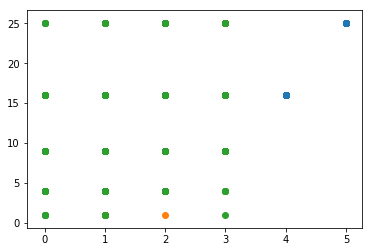

In [99]:
plt.scatter(df.bedrooms,df.price_square)
plt.scatter(df.bathrooms,df.price_square)
plt.scatter(df.parking_space,df.price_square)# and after

### Log transformation:

In [100]:
df['price_log'] = None
i = 0
for row in df.iterrows():
    df['price_log'].at[i] = math.log(df["bedrooms"][i])
    i += 1

    
df.head()

,price,bedrooms,bathrooms,parking_space,property_type,price_scale,bedrooms_scale,price_minmax,price_root,price_square,price_log
0,8585000,4,2,2,house,-0.083888,-1.497033,0.171744,2,16,1.38629
1,4455000,4,1,2,house,-0.763712,-1.497033,0.075698,2,16,1.38629
2,7749000,3,2,2,house,-0.221499,-1.497033,0.152302,1.73205,9,1.09861
3,14640000,4,2,3,house,0.912804,-1.497033,0.312558,2,16,1.38629
4,23700000,4,3,3,house,2.404138,-1.497033,0.523256,2,16,1.38629


### The graph of log transformation

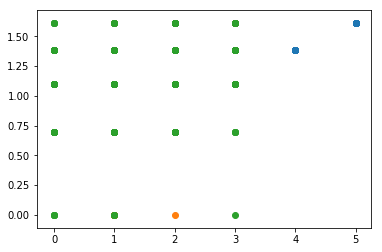

In [101]:
%matplotlib inline
plt.scatter(df.bedrooms, df.price_log)
plt.scatter(df.bathrooms, df.price_log)
plt.scatter(df.parking_space,df.price_log)

# and after

### The best transformation for this data is log transformation. As the data is positively skewed, it needs to compress large values to clarify the data, whcih need to move down the ladder of powers to spread out data that is clustered at lower values. Therefore, logarithmic is the appropriate transformation in this case.


# Multiple Regression & Quantile regression model and distribution

## Multiple Regression is the regression model with Many Predictor Variables.

## Linear Regression is the regression model with one predictor
### A linear regression model provided by the sklearn library. Linear Regression is an approach in the statistics which is used to model the relation between a scalar response and one or multiple independent variables. In simple words, this approach is used to predict or estimate the model parameters based on the provided data (Montgomery, Peck, & Vining, 2012). Simplest case of linear regression has been used for this exercise and trained over all the provided data. Later, once the model is trained, estimations or predictions were made and new dataset was saved. 

## Multiple Regression is for the case which with many predictors.

### The purpose of multiple regression is to predict a single variable from one or more independent variables. Multiple regression with many predictor variables is an extension of linear regression with two predictor variables.

### Before creating a regression model, it should turn the predictor "house" into a numeric type.

In [102]:
d = {'house':1 }

In [103]:
df.property_type = df.property_type.map(d)

In [104]:
df

,price,bedrooms,bathrooms,parking_space,property_type,price_scale,bedrooms_scale,price_minmax,price_root,price_square,price_log
0,8585000,4,2,2,1,-0.083888,-1.497033,0.171744,2,16,1.38629
1,4455000,4,1,2,1,-0.763712,-1.497033,0.075698,2,16,1.38629
2,7749000,3,2,2,1,-0.221499,-1.497033,0.152302,1.73205,9,1.09861
3,14640000,4,2,3,1,0.912804,-1.497033,0.312558,2,16,1.38629
4,23700000,4,3,3,1,2.404138,-1.497033,0.523256,2,16,1.38629
5,5760000,3,1,1,1,-0.548901,-1.497033,0.106047,1.73205,9,1.09861
6,6116000,1,1,0,1,-0.490301,-1.497033,0.114326,1,1,0
7,6970000,4,2,2,1,-0.349727,-1.497033,0.134186,2,16,1.38629
8,10116000,3,1,3,1,0.168125,-1.497033,0.207349,1.73205,9,1.09861
9,5520000,2,1,1,1,-0.588406,-1.497033,0.100465,1.41421,4,0.693147


## 1. The model of stanardization(Z-score) --price_scale

### Get the multiple regression model of "price_scale" which is the model of standardization. 
### import linear regression library

In [105]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df[["bedrooms"]+["bathrooms"]+["property_type"]+["parking_space"]], df[["price_scale"]])
predictions = lr.predict(df[["bedrooms"]+["bathrooms"]+["property_type"]+["parking_space"]])
import statsmodels.formula.api as sm
model = sm.ols(formula='price_scale ~ bedrooms+bathrooms+parking_space+property_type', data=df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_scale   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     30.49
Date:                Sun, 28 Oct 2018   Prob (F-statistic):           7.22e-19
Time:                        23:04:25   Log-Likelihood:                -1384.9
No. Observations:                1007   AIC:                             2778.
Df Residuals:                    1003   BIC:                             2798.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5286      0.066     -8.065      0.000      -0.657      -0.400
bedrooms          0.1749      0.049      3.559      0.000       0.078       0.271
bathrooms         0.2896      0.060      4.819      0.000       0.172       0.407
parking_space     0.0246      0.041      0.605      0.545      -0.055       0.104
property_type    -0.5286      0.066     -8.065      0.000      -0.657      -0.400
==============================================================================
Omnibus:                      445.989   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2370.148
Skew:                           2.007   Prob(JB):                         0.00
Kurtosis:                       9.355   Cond. No.                     2.79e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Quantile regression in summary--price scale 

In [106]:
from __future__ import print_function
import patsy
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

mod = smf.quantreg('bedrooms ~ price_scale', df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:               bedrooms   Pseudo R-squared:           -4.821e-07
Model:                       QuantReg   Bandwidth:                      0.3663
Method:                 Least Squares   Sparsity:                       0.8674
Date:                Sun, 28 Oct 2018   No. Observations:                 1007
Time:                        23:04:28   Df Residuals:                     1005
                                        Df Model:                            1
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.0000      0.014    219.516      0.000       2.973       3.027
price_scale  2.469e-06      0.014      0.000      1.000      -0.027       0.027


#### Prepare the data for quantile regression model plotting.

In [107]:
# prepare data for plotting
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['price_scale']] + \
            res.conf_int().loc['price_scale'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('bedrooms ~ price_scale', df).fit()
ols_ci = ols.conf_int().loc['price_scale'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['price_scale'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q         a             b        lb        ub
0  0.05  2.000000  2.011831e-07 -0.055134  0.055134
1  0.15  2.999925  3.685514e-05 -0.017683  0.017756
2  0.25  3.000000  3.912387e-07 -0.020924  0.020925
3  0.35  3.000000  4.912351e-07 -0.022996  0.022997
4  0.45  3.000001  1.029890e-06 -0.025666  0.025668
5  0.55  3.000005  7.827428e-06 -0.027651  0.027667
6  0.65  3.233340  2.601195e-01  0.226617  0.293622
7  0.75  3.744882  2.431012e-01  0.118763  0.367439
8  0.85  4.000000  1.672176e-06 -0.042665  0.042668
9  0.95  4.374600  3.661906e-01  0.310569  0.421812
{'a': 3.2005958291956258, 'b': 0.18826272837136268, 'lb': 0.14227642286383782, 'ub': 0.23424903387888754}


### This plot compares best fit lines for 10 quantile regression models to the least squares fit.

bedrooms increases with price_scale
### Plot the quantile regression model. 

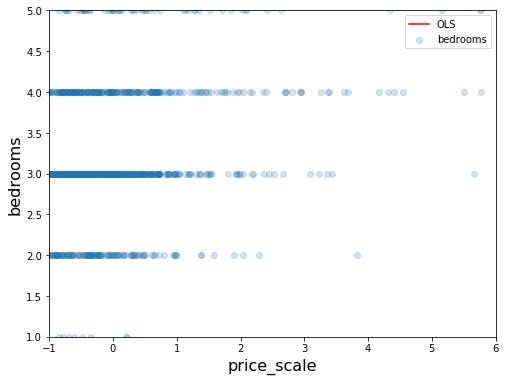

In [108]:
x = np.arange(df.price_scale.min(), df.price_scale.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(df.price_scale, df.bedrooms, alpha=.2)
ax.set_xlim((-1, 6))
ax.set_ylim((1, 5))
legend = ax.legend()
ax.set_xlabel('price_scale', fontsize=16)
ax.set_ylabel('bedrooms', fontsize=16);

## 2. The model of MinMax Scaler

### Get the multiple regression model of "price_minmax" which uses MinMaxScaler. 

In [109]:
lr.fit(df[["bedrooms"]+["bathrooms"]+["property_type"]+["parking_space"]], df[["price_minmax"]])
predictions = lr.predict(df[["bedrooms"]+["bathrooms"]+["property_type"]+["parking_space"]])

model = sm.ols(formula='price_minmax ~ bedrooms+bathrooms+property_type+parking_space', data=df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_minmax   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     30.49
Date:                Sun, 28 Oct 2018   Prob (F-statistic):           7.22e-19
Time:                        23:04:40   Log-Likelihood:                 585.78
No. Observations:                1007   AIC:                            -1164.
Df Residuals:                    1003   BIC:                            -1144.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0171      0.009      1.849      0.065      -0.001       0.035
bedrooms          0.0247      0.007      3.559      0.000       0.011       0.038
bathrooms         0.0409      0.008      4.819      0.000       0.024       0.058
property_type     0.0171      0.009      1.849      0.065      -0.001       0.035
parking_space     0.0035      0.006      0.605      0.545      -0.008       0.015
==============================================================================
Omnibus:                      445.989   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2370.148
Skew:                           2.007   Prob(JB):                         0.00
Kurtosis:                       9.355   Cond. No.                     3.32e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Quantile regression in summary--price_maxmin

In [110]:
from __future__ import print_function
import patsy
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

mod = smf.quantreg('bedrooms ~ price_minmax', df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:               bedrooms   Pseudo R-squared:           -1.867e-07
Model:                       QuantReg   Bandwidth:                      0.3663
Method:                 Least Squares   Sparsity:                       0.8674
Date:                Sun, 28 Oct 2018   No. Observations:                 1007
Time:                        23:04:43   Df Residuals:                     1005
                                        Df Model:                            1
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.0000      0.022    133.873      0.000       2.956       3.044
price_minmax  6.867e-06      0.097    7.1e-05      1.000      -0.190       0.190


### Prepare the data for quantile regression model plotting.

In [111]:
# prepare data for plotting
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['price_minmax']] + \
            res.conf_int().loc['price_minmax'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('bedrooms ~ price_minmax', df).fit()
ols_ci = ols.conf_int().loc['price_minmax'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['price_minmax'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q         a         b        lb        ub
0  0.05  2.000000  0.000001 -0.390241  0.390243
1  0.15  2.999890  0.000209 -0.119858  0.120277
2  0.25  2.999999  0.000002 -0.146563  0.146568
3  0.35  3.000000  0.000003 -0.162751  0.162756
4  0.45  2.999999  0.000005 -0.181649  0.181658
5  0.55  2.999998  0.000017 -0.195907  0.195941
6  0.65  2.895312  1.841147  1.604016  2.078278
7  0.75  3.428971  1.720688  0.840618  2.600758
8  0.85  3.999999  0.000005 -0.302936  0.302945
9  0.95  3.898734  2.591923  2.198232  2.985614
{'a': 2.9559472894019905, 'b': 1.3325377357939514, 'lb': 1.0070432104110536, 'ub': 1.6580322611768492}


### Plot the quantile regression model.¶

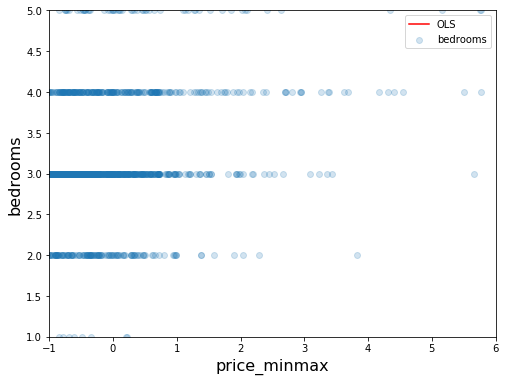

In [112]:
x = np.arange(df.price_scale.min(), df.price_scale.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(df.price_scale, df.bedrooms, alpha=.2)
ax.set_xlim((-1, 6))
ax.set_ylim((1, 5))
legend = ax.legend()
ax.set_xlabel('price_minmax', fontsize=16)
ax.set_ylabel('bedrooms', fontsize=16);

## 3. The model of log transformation

### Get the multiple regression model of "price_log". 
### The multiple regression model of log transformation.
### The log transformation is the most popular among the transformations and it could be used to transform skewed data to approximately conform to normality.(Changyong, Hongyue, Naiji, Tian, Hua, & Ying, 2014) Moreover, the results of standard statistical tests performed on log-transformed data are often not relevant for the original data.

In [115]:
import pandas as pd

import statsmodels.api as sm
y=df[['price_log']]
x = df[['bedrooms']+['bathrooms']+['parking_space']+['property_type']]
x = sm.add_constant(x)
model = sm.OLS(y.astype(float),x.astype(float))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     7264.
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:05:47   Log-Likelihood:                 1521.8
No. Observations:                1007   AIC:                            -3036.
Df Residuals:                    1003   BIC:                            -3016.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms          0.3290      0.003    120.034      0.000       0.324       0.334
bathrooms        -0.0142      0.003     -4.225      0.000      -0.021      -0.008
parking_space     0.0066      0.002      2.919      0.004       0.002       0.011
property_type     0.0920      0.007     12.592      0.000       0.078       0.106
==============================================================================
Omnibus:                      899.718   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30705.679
Skew:                          -4.042   Prob(JB):                         0.00
Kurtosis:                      28.816   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Quantile regression in summary--price_log

In [114]:
from __future__ import print_function
import patsy
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

mod = smf.quantreg('bedrooms ~ price_log', df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:               bedrooms   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   1.041e-14
Method:                 Least Squares   Sparsity:                          inf
Date:                Sun, 28 Oct 2018   No. Observations:                 1007
Time:                        23:05:12   Df Residuals:                     1002
                                        Df Model:                            4
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.0000        nan        nan        nan         nan         nan
price_log[T.0.6931471805599453]     1.0000        nan        nan        nan         nan         nan
price_log[T.1.0986122886681098]     2.0000     

/anaconda/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:207: RuntimeWarning: divide by zero encountered in double_scalars
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
/anaconda/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:209: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
/anaconda/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  lfit.sparsity = 1. / fhat0
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: Runtime

### Plot the quantile regression model.

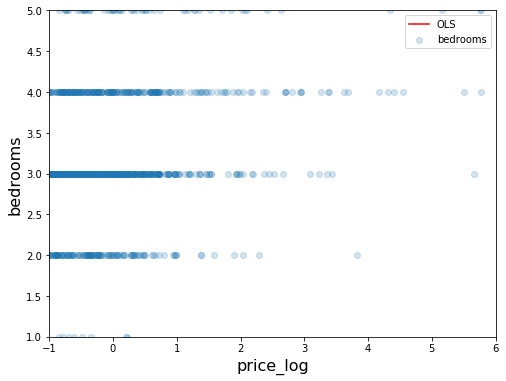

In [116]:
x = np.arange(df.price_scale.min(), df.price_scale.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(df.price_scale, df.bedrooms, alpha=.2)
ax.set_xlim((-1, 6))
ax.set_ylim((1, 5))
legend = ax.legend()
ax.set_xlabel('price_log', fontsize=16)
ax.set_ylabel('bedrooms', fontsize=16);

## 4. The model of root transformation

### Get the multiple regression model of "price_root". 
### The multiple regression model of root transformation.

In [118]:
import statsmodels.api as sm

y=df[['price_log']]
x = df[['bedrooms']+['bathrooms']+['parking_space']+['property_type']]
x = sm.add_constant(x)
model = sm.OLS(y.astype(float),x.astype(float))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     7264.
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:06:16   Log-Likelihood:                 1521.8
No. Observations:                1007   AIC:                            -3036.
Df Residuals:                    1003   BIC:                            -3016.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms          0.3290      0.003    120.034      0.000       0.324       0.334
bathrooms        -0.0142      0.003     -4.225      0.000      -0.021      -0.008
parking_space     0.0066      0.002      2.919      0.004       0.002       0.011
property_type     0.0920      0.007     12.592      0.000       0.078       0.106
==============================================================================
Omnibus:                      899.718   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30705.679
Skew:                          -4.042   Prob(JB):                         0.00
Kurtosis:                      28.816   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Quantile regression in summary--price_square

In [119]:
from __future__ import print_function
import patsy
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

mod = smf.quantreg('bedrooms ~ price_square', df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:               bedrooms   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   1.041e-14
Method:                 Least Squares   Sparsity:                          inf
Date:                Sun, 28 Oct 2018   No. Observations:                 1007
Time:                        23:06:23   Df Residuals:                     1002
                                        Df Model:                            4
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0000        nan        nan        nan         nan         nan
price_square[T.4.0]      1.0000        nan        nan        nan         nan         nan
price_square[T.9.0]      2.0000        nan        nan        nan         nan         nan
pr

/anaconda/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:207: RuntimeWarning: divide by zero encountered in double_scalars
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
/anaconda/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:209: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
/anaconda/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  lfit.sparsity = 1. / fhat0
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: Runtime

### Plot the quantile regression model.

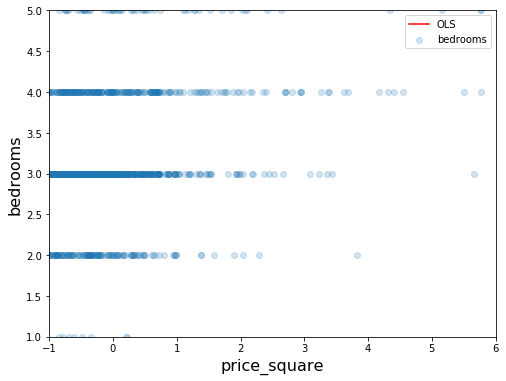

In [120]:
x = np.arange(df.price_scale.min(), df.price_scale.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(df.price_scale, df.bedrooms, alpha=.2)
ax.set_xlim((-1, 6))
ax.set_ylim((1, 5))
legend = ax.legend()
ax.set_xlabel('price_square', fontsize=16)
ax.set_ylabel('bedrooms', fontsize=16);

## 5. The model of square transformation

### Get the multiple regression model of "price_square". 
### The multiple regression model of square power transformation.
### Tukey (1977) describes an orderly way of re-expressing variables using a power transformation. Statistical methods such as t-tests and the analysis of variance assume normal distributions. However, these methods are relatively robust to violations of normality, transforming the distributions to reduce skew can markedly increase their power.

In [122]:
import statsmodels.api as sm

y=df[['price_square']]
x = df[['bedrooms']+['bathrooms']+['parking_space']+['property_type']]
x = sm.add_constant(x)
model = sm.OLS(y.astype(float),x.astype(float))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_square   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:06:41   Log-Likelihood:                -1291.1
No. Observations:                1007   AIC:                             2590.
Df Residuals:                    1003   BIC:                             2610.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms          6.5726      0.045    146.783      0.000       6.485       6.661
bathrooms         0.1772      0.055      3.236      0.001       0.070       0.285
parking_space    -0.1263      0.037     -3.412      0.001      -0.199      -0.054
property_type   -10.2927      0.119    -86.193      0.000     -10.527     -10.058
==============================================================================
Omnibus:                      490.623   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2476.413
Skew:                           2.286   Prob(JB):                         0.00
Kurtosis:                       9.174   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Quantile regression in summary--price_square

In [123]:
from __future__ import print_function
import patsy
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

mod = smf.quantreg('bedrooms ~ price_square', df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:               bedrooms   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   1.041e-14
Method:                 Least Squares   Sparsity:                          inf
Date:                Sun, 28 Oct 2018   No. Observations:                 1007
Time:                        23:06:46   Df Residuals:                     1002
                                        Df Model:                            4
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0000        nan        nan        nan         nan         nan
price_square[T.4.0]      1.0000        nan        nan        nan         nan         nan
price_square[T.9.0]      2.0000        nan        nan        nan         nan         nan
pr

/anaconda/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:207: RuntimeWarning: divide by zero encountered in double_scalars
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
/anaconda/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:209: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
/anaconda/lib/python3.6/site-packages/statsmodels/regression/quantile_regression.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  lfit.sparsity = 1. / fhat0
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: Runtime

### Plot the quantile regression model.

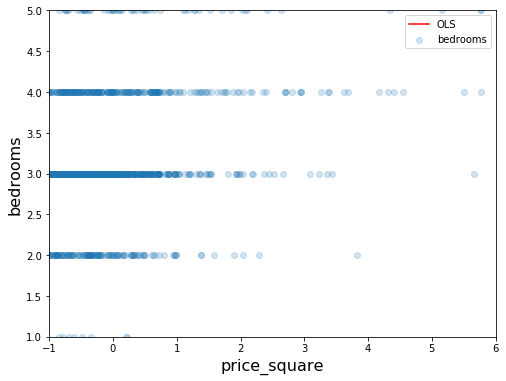

In [124]:
x = np.arange(df.price_scale.min(), df.price_scale.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(df.price_scale, df.bedrooms, alpha=.2)
ax.set_xlim((-1, 6))
ax.set_ylim((1, 5))
legend = ax.legend()
ax.set_xlabel('price_square', fontsize=16)
ax.set_ylabel('bedrooms', fontsize=16);

## Conclusion : 
### 1.When using linear regression, there is no need to standardize. Because before and after standardization, linear regression predictions are not affected.

### 2. In linear regression, whether or not to standardize will not affect the final prediction effect, even if the weight of the training is different.
### 3. After log transformation, the data could response to the real condiction.
### 4. The more features of the data set, the more likely the features are linearly related, and the more unreliable the use of coefficients to explain the importance of features.
### 5. R-squared explain that how many variances in the model can be explained by independent variables. That is mean that R-squared could used to expalin the model. However, the R-squared of Z-score and MinMax are 0.084 which is small and under 0.01. That is mean the stanardization does not have to be applied in regression. Besides, log transformation and root transformation are both 0.956 which close to 1 and could be well explianed the model. Moreover , the R-squared in the model which used square transformation is 0.971. 
### 6. Overall, the square transformation is the best one in all of the methods.  

### Reference : 
### 1. Reading json from a file, https://stackoverflow.com/questions/20199126/reading-json-from-a-file
### 2. Convert json to csv using python, https://stackoverflow.com/questions/48568649/convert-json-to-csv-using-python
### 3. How to convert json into csv ,https://coderwall.com/p/xdonta/how-to-convert-json-to-csv-excel
### 4.Reordering columns in a csv ,https://stackoverflow.com/questions/33001490/python-re-ordering-columns-in-a-csv
### 5. How-To Use Python to Remove or Modify Empty Values in a CSV Dataset, https://code.likeagirl.io/how-to-use-python-to-remove-or-modify-empty-values-in-a-csv-dataset-34426c816347
### 6. Merging two csv file using python,https://stackoverflow.com/questions/16265831/merging-two-csv-files-using-python
### 7.Haversine formula in python(bearing and distance between two gps points), https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

### 8. Point in polygon using R-tree adn shapely, https://gis.stackexchange.com/questions/148233/point-in-polygon-using-rtree-and-shapely
### 9. Point in polygon wiki, https://en.wikipedia.org/wiki/Point_in_polygon
### 10. Minumun bounding retangle , https://en.wikipedia.org/wiki/Minimum_bounding_rectangle
### 12. What's the fastest way of checking if a point is inside a polygon in python, https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python
### 13. Manage spatial data using Geopandas and Shapely in Python,https://cambridgespark.com/manage-spatial-data-using-geopandas-and-shapely-in-python/
### 14. Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821): John Wiley & Sons.

### 15. When and why to standardize a variable, retrieved from https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html
### 16. Is standardisation befere lasso really necessay,retrieved from https://stats.stackexchange.com/questions/86434/is-standardisation-before-lasso-really-necessary
### 17. When conducting multiple regression when should you center your predictor variable & when should you stanardize them ,retrieved from https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia
### 18.Convert a column in a python pandas from string month into int ,https://stackoverflow.com/questions/42684530/convert-a-column-in-a-python-pandas-from-string-month-into-int
### 19.Multiple Regression in Python, https://statinfer.com/204-1-6-multiple-regression-in-python/
### 20. Changyong, F. E. N. G., Hongyue, W. A. N. G., Naiji, L. U., Tian, C. H. E. N., Hua, H. E., & Ying, L. U. (2014). Log-transformation and its implications for data analysis. Shanghai archives of psychiatry, 26(2), 105., retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/
### 21. Spano, L., Mariotti, D., Pezzotti, M., Damiani, F., & Arcioni, S. (1987). Hairy root transformation in alfalfa (Medicago sativa L.). Theoretical and applied genetics, 73(4), 523-530.
### 22. Tukey, J. W. (1977). Exploratory Data Analysis. Addison-Wesley, Reading, MA ,retreived from http://onlinestatbook.com/2/transformations/tukey.html
### 23. Quantile regression, retrieved from http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html 

